<a href="https://colab.research.google.com/github/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/Filmes_no_Brasil_2009_2019_An%C3%A1lise_de_Dados_em_Python_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Aumentando meu nível

https://www.kaggle.com/joaoavf/introducao-a-analise-de-dados-python-e-pandas

https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados/



#Análise de dados de filmes exibidos no Brasil de 2009 a 2019

#####Com base nos dados da Ancine (https://oca.ancine.gov.br) vamos analisar os filmes exibidos no Brasil

Arquivo -> filmes_no_Brasil_2009_2019.xlsx



In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# carrega um dataframe com base no arquivo excel sem as 2 primeiras linhas do titulo e chute as 20 ultimas linhas
df = pd.read_excel('https://github.com/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/filmes_no_Brasil_2009_2019.xlsx?raw=true', skiprows=2 ,skipfooter=20)
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


#### Analizando problemas de dados no Dataframe  
df.shape    # verifica o tamanho do dataframe   (linhas, colunas)<br>
df.dtypes   # todas colunas e os tipos [object(texto ou não sabe o que é)]<br>

*   Item da lista
*   Item da lista


df.describe()<br>
df.info()<br>
df.head(4)<br>
df.sample(10)   #lista linhas aleatórias<br>
df.tail()<br>
df.isnull().sum() retorna o número de valores ausentes para cada coluna.<br>
df.isnull().sum().sum() retorna o número total de valores ausentes.<br>
descobrir a porcentagem de valores que estão faltando, executando: df.isna().mean()<br>
    🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗<br>


In [3]:
df.shape

(7081, 11)

In [4]:
df.nunique()

Ano de exibição                      11
Título da obra                     4983
CPB/ROE                            4808
Gênero                                4
País(es) produtor(es) da obra       467
Nacionalidade da obra                 2
Data de lançamento                  878
Empresa distribuidora               370
Origem da empresa distribuidora       3
Público no ano de exibição         5075
Renda (R$) no ano de exibição      6546
dtype: int64

In [5]:
df.isnull().sum()

Ano de exibição                    0
Título da obra                     0
CPB/ROE                            0
Gênero                             0
País(es) produtor(es) da obra      0
Nacionalidade da obra              0
Data de lançamento                 0
Empresa distribuidora              0
Origem da empresa distribuidora    0
Público no ano de exibição         0
Renda (R$) no ano de exibição      0
dtype: int64

In [6]:
df['nome_len'] = df['Gênero'].str.len()
df['nome_len']

0        6
1        6
2        6
3        6
4        8
        ..
7076     6
7077    12
7078     6
7079     6
7080     6
Name: nome_len, Length: 7081, dtype: int64

In [7]:
df.describe()

,Ano de exibição,nome_len
count,7081.000000,7081.000000
mean,2014.339924,7.006920
std,3.106327,2.109725
min,2009.000000,6.000000
25%,2012.000000,6.000000
50%,2015.000000,6.000000
75%,2017.000000,6.000000
max,2019.000000,12.000000


In [8]:
df.sample(10)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,nome_len
5273,2012,Os Acompanhantes,E1600192600000,Ficção,"Estados Unidos, França",Estrangeira,41082,Vinny Filmes,Distribuição Nacional,7698,76666.5,6
2977,2015,As Maravilhas,E1500069600000,Ficção,Itália,Estrangeira,42110,Alpha Filmes,Distribuição Nacional,10175,135611,6
2131,2016,A Garota do Livro,E1600316100000,Ficção,Estados Unidos,Estrangeira,42516,Playarte,Distribuição Nacional,16896,295919,6
2073,2017,Victoria e Abdul - O Confidente da Rainha,E1700346900000,Ficção,"Estados Unidos, Reino Unido",Estrangeira,43055,Universal,Distribuição Internacional,106701,2135329,6
2798,2016,Um Amor a Cada Esquina,E1500268600000,Ficção,"Alemanha, Estados Unidos",Estrangeira,42292,Alphaville Filmes,Distribuição Nacional,194,1720,6
1414,2017,A Família Dionti,B1500334900000,Ficção,Brasil,Brasileira,42824,ArtHouse,Distribuição Nacional,3458,36961.7,6
6257,2010,"Moscou, Bélgica",E1600608600000,Ficção,Bélgica,Estrangeira,40445,Filmes da Mostra,Distribuição Nacional,7724,73082.5,6
4444,2013,Bastardos,E1500490300000,Ficção,"Alemanha, França",Estrangeira,41565,Imovision,Distribuição Nacional,11006,150623,6
3645,2015,Winter Sleep,E1500170200000,Ficção,Turquia,Estrangeira,42124,Alpha Filmes,Distribuição Nacional,8309,99318.5,6
3921,2014,Heli,E1600119300000,Ficção,México,Estrangeira,41781,Zeta Filmes,Distribuição Nacional,2352,22155.5,6


In [9]:
df.tail()   # nan  = not a number

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,nome_len
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013,6
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5,12
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171,6
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276,6
7080,2009,Última Parada - 174,B0800914800000,Ficção,Brasil,Brasileira,39745,Paramount,Distribuição Internacional,2107,8954,6


In [10]:
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,nome_len
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70,6
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805,6
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295,6
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186,6
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531,8


In [11]:
df.dtypes


Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
nome_len                            int64
dtype: object

In [12]:
#----1
# Transformar o campo Data de lançamento em data
df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

TypeError: ignored

In [ ]:
#---2
# identificar o problema da coluna Data de lançamento
df['Data de lançamento'].value_counts() 


In [ ]:
#---3
# exibir Data de lançamento  como relançamento
df[df['Data de lançamento'] == 'Relançamento']

#### Decisão sobre dados incorretos/ faltantes/divergentes

apagar?   atualizar manual os dados? o que fazer? Qual decisão?

In [ ]:
df.shape

In [ ]:
df_novo.shape

In [15]:
#---4
#criar(copia) um novo dataframe sem as linhas Relançamentos (-198 linhas)
df_novo = df[df['Data de lançamento'] != 'Relançamento']
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,nome_len
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70,6
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805,6
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295,6
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186,6
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531,8


In [16]:
df.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
nome_len                            int64
dtype: object

In [ ]:
#---5
# converter a coluna Data de lançamento para datetime
# df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

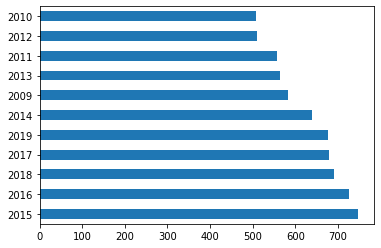

In [17]:
df_novo['Ano de exibição'].value_counts().plot.barh()

In [26]:
df_novo.rename(columns={'Renda (R$) no ano de exibição': 'Renda_total_exibicao'}, inplace = True)   # troca o nome de uma coluna
df_novo.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda_total_exibição,nome_len
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70,6
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805,6
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295,6
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186,6
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531,8


In [31]:
# df[df['mensalidade'] == df['mensalidade'].max()] 
# df_novo[df_novo['Público no ano de exibição'] == int(df_novo['Público no ano de exibição'].max())]
df_novo.nlargest(3, 'Ano de exibição')

# 54 03

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda_total_exibição,nome_len
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70,6
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805,6
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295,6
